**Mall Customers Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


Data Exploration

In [ ]:
df= pd.read_csv('Mall_Customers.csv')
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Data cleaning

In [ ]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop('CustomerID',axis=1,inplace=True)   #we remove the CustId because its just an identifier not useful for clustering

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Data Transformation

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
#Feature Selection

x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

Data visualization(EDA)

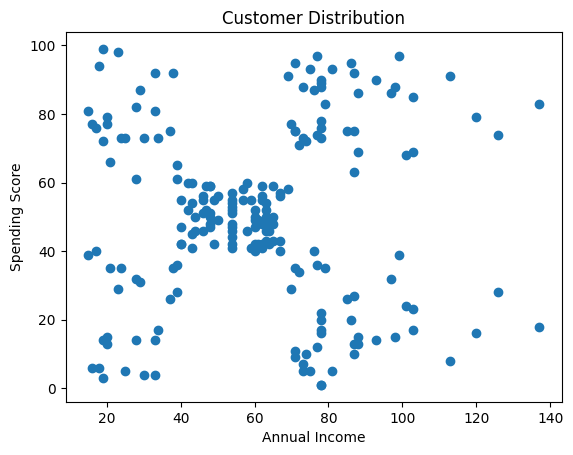

In [ ]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Distribution')
plt.show()

Data Mining

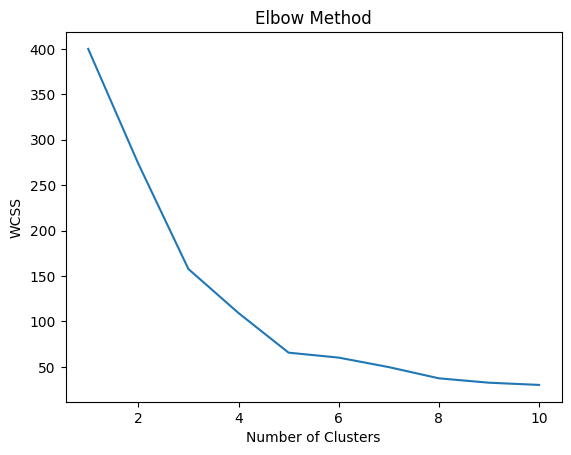

In [ ]:
#Clustering because its unsupervised learning
#Algorithm 1 - K Means clustering (Elbow Method)
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=42)
df['KMeans_Cluster']=kmeans.fit_predict(x_scaled)

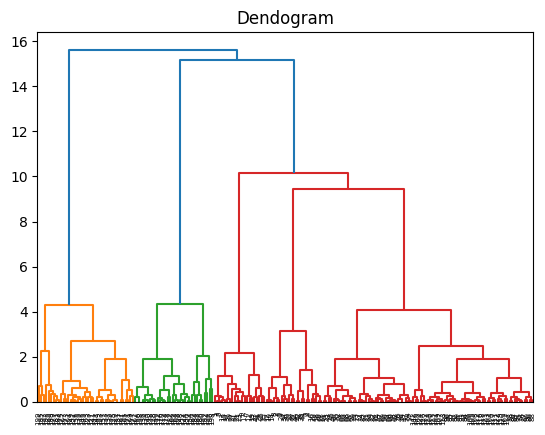

In [ ]:
from os import link
#Algorithm 2
#Hierarchical Clustering (Dendogram)
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(x_scaled,method='ward')
dendrogram(linked)
plt.title('Dendogram')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,)
df['Hierarchical_Cluster']=hc.fit_predict(x_scaled)
plt.show()

Visualizing Hierarchical Clusters

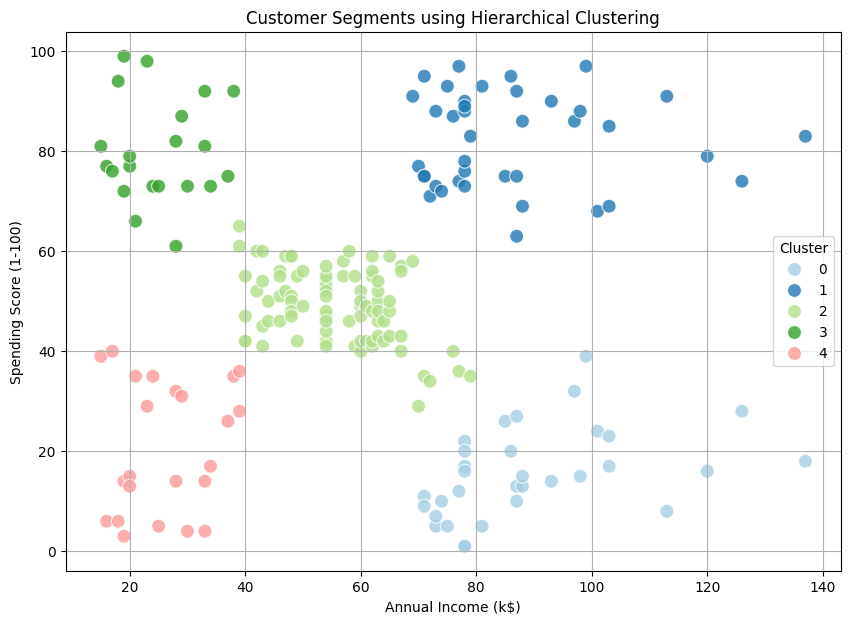

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', data=df, palette='Paired', s=100, alpha=0.8)
plt.title('Customer Segments using Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
#algorithm 3
#Gaussian Mixture model (GMM) (Probabilistic Clustering)
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=5,random_state=42)
df['GMM_Cluster']=gmm.fit_predict(x_scaled)

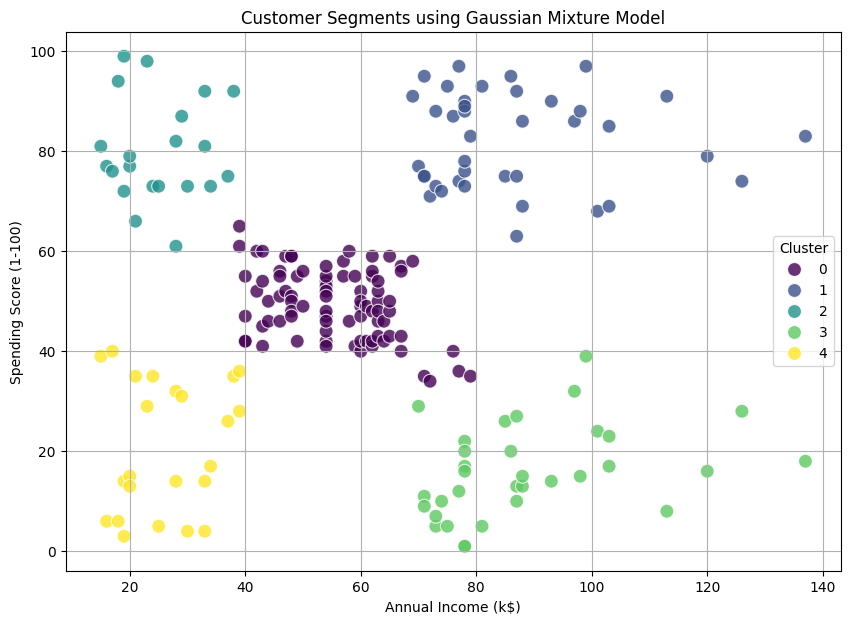

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='GMM_Cluster', data=df, palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments using Gaussian Mixture Model')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Model Evaluation (Unsupervised)

In [ ]:
from sklearn.metrics import silhouette_score
print("KMeans:",silhouette_score(x_scaled,df['KMeans_Cluster']))
print("Hierarchical:",silhouette_score(x_scaled,df['Hierarchical_Cluster']))
print("GMM:",silhouette_score(x_scaled,df['GMM_Cluster']))

KMeans: 0.5546571631111091
Hierarchical: 0.5538089226688662
GMM: 0.5536892843811245


Model Prediction

In [ ]:
new_customer_data={'Annual Income (k$)': [60], 'Spending Score (1-100)': [70]}
new_customer_df = pd.DataFrame(new_customer_data)
new_customer_scaled=scaler.transform(new_customer_df)
cluster=kmeans.predict(new_customer_scaled)

In [ ]:
print(f"The new customer belongs to cluster: {cluster[0]}")

The new customer belongs to cluster: 0


In [ ]:
df[df['KMeans_Cluster']==0].mean()

,0
Gender,0.407407
Age,42.716049
Annual Income (k$),55.296296
Spending Score (1-100),49.518519
KMeans_Cluster,0.000000
Hierarchical_Cluster,2.000000
GMM_Cluster,0.000000


Final Dataset

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster,GMM_Cluster
0,1,19,15,39,4,4,4
1,1,21,15,81,2,3,2
2,0,20,16,6,4,4,4
3,0,23,16,77,2,3,2
4,0,31,17,40,4,4,4


In [ ]:
df[df['KMeans_Cluster']==4].mean() #high income - high spending customers

,0
Gender,0.391304
Age,45.217391
Annual Income (k$),26.304348
Spending Score (1-100),20.913043
KMeans_Cluster,4.000000
Hierarchical_Cluster,4.000000
GMM_Cluster,4.000000


Range of clusters

In [ ]:
df.groupby('KMeans_Cluster')['Spending Score (1-100)'].agg(['min','max','mean'])

,min,max,mean
KMeans_Cluster,,,
0,34,61,49.518519
1,63,97,82.128205
2,61,99,79.363636
3,1,39,17.114286
4,3,40,20.913043


In [ ]:
cluster_labels={
    0:"medium income - high spenders",
    1:"medium income - medium spenders",
    2:"low income - low spenders",
    3:"high income - high spenders",
    4:"low income - medium spenders"
}

df['Cluster_labels']=df['KMeans_Cluster'].map(cluster_labels)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster,GMM_Cluster,Cluster_labels
0,1,19,15,39,4,4,4,low income - medium spenders
1,1,21,15,81,2,3,2,low income - low spenders
2,0,20,16,6,4,4,4,low income - medium spenders
3,0,23,16,77,2,3,2,low income - low spenders
4,0,31,17,40,4,4,4,low income - medium spenders
